# Churn Analysis - Figuring out which customers may leave

In [1]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Get summary stats on our numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [4]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [5]:
df.MonthlyCharges.unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [6]:
len(df.MonthlyCharges.unique())

1585

In [7]:
print('Rows   :',df.shape[0])
print('Columns:',df.shape[1])
print('\nFeatures: \n',df.columns.tolist())
print('\nMissing Values: ', df.isnull().sum().values.sum())
print('\nUnique Values: \n',df.nunique())

Rows   : 7043
Columns: 21

Features: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values:  0

Unique Values: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Exploratory Data Analysis

In [9]:
df_copy = df.copy()

In [10]:
df_copy.drop(['customerID','MonthlyCharges','TotalCharges','tenure'],axis=1,inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [11]:
summary = pd.concat([pd.crosstab(df_copy[x],df_copy.Churn) for x in df_copy.columns[:-1]], keys=df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [12]:
summary['Churn_Percentage'] = summary['Yes']/(summary['No']+summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

## Visualizations and EDA

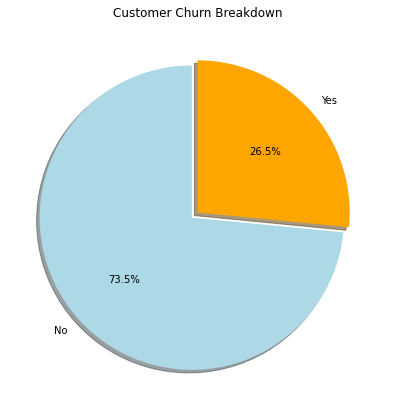

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

labels = df['Churn'].value_counts(sort=True).index
sizes = df['Churn'].value_counts(sort=True)

colors = ['lightblue','orange']
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle = 90,)

plt.title('Customer Churn Breakdown')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


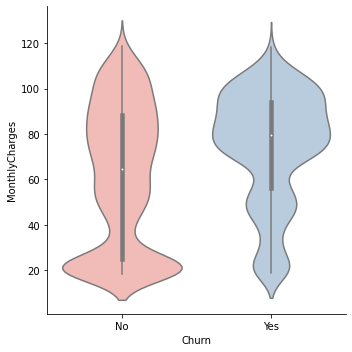

In [14]:
g = sns.factorplot(x='Churn', y='MonthlyCharges', data=df, kind='violin', palette='Pastel1')

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


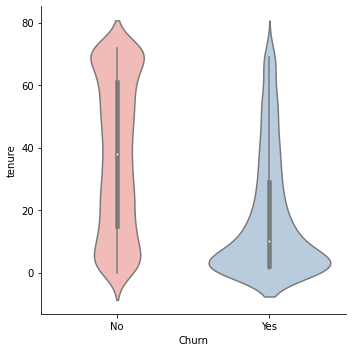

In [15]:
g = sns.factorplot(x='Churn', y='tenure', data=df, kind='violin', palette='Pastel1')

No handles with labels found to put in legend.


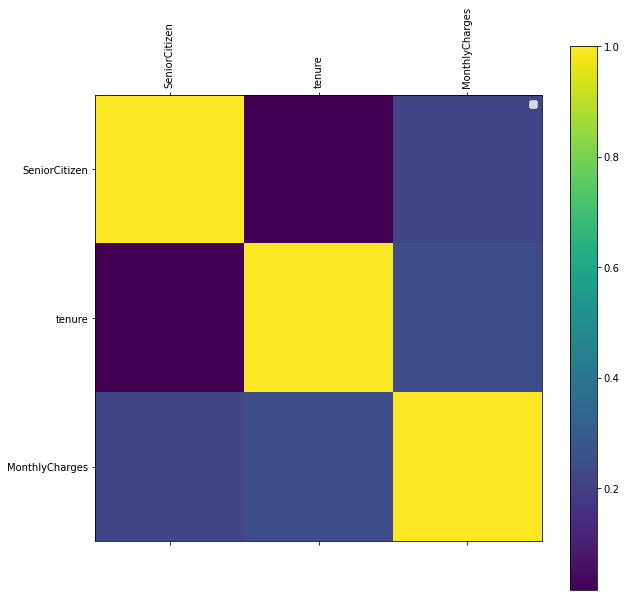

In [16]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

## Prepare Data for Machine Learning Classifer

In [17]:
# Check for empty fields
len(df[df['TotalCharges'] == " "])

11

In [18]:
# Drop missing data
df = df[df['TotalCharges'] != " "]

In [19]:
len(df[df['TotalCharges'] == " "])

0

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns = multi_cols )
df.head()

C:\Users\Chloe\AppData\Local\Temp/ipykernel_12452/3299693973.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [21]:
len(df.columns)

42

In [22]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
#Scaling Numerical Columns
std = StandardScaler()

#Scale Data
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

df_telcom_og = df.copy()
df = df.drop(columns=num_cols, axis=1)
df = df.merge(scaled, left_index=True, right_index=True, how='left')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [24]:
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [25]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [26]:
df = df.dropna()

In [27]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


## Modeling

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1).values

y = df['Churn'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
type(X_train)

numpy.ndarray

In [31]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.117272,0.470412,-0.840418
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.954296,0.174572,-0.758357
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.424625,0.156290,-0.346376
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.797694,0.812788,1.045217
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.239504,-1.464182,-0.987863


In [32]:
print(len(df.columns))
df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


## Fit a Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy = ' + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7883246321784527
[[1359  164]
 [ 282  302]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1523
           1       0.65      0.52      0.58       584

    accuracy                           0.79      2107
   macro avg       0.74      0.70      0.72      2107
weighted avg       0.78      0.79      0.78      2107



## Feature Importance using Logistic Regression

In [35]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.017438497535399503, 0.19845272955616095, 0.2693868700669839, 0.10856224248158645, 0.05346645822671411, 0.3036721717000786, 0.03759525552071975, 0.05382273650036297, 0.015871202706001775, 0.27823175364750113, 0.37705520312320356, 0.09846717120212657, 0.34406728163953904, 0.09846717120212657, 0.24524383216380297, 0.25064537420871646, 0.09846717120212657, 0.15182192473299633, 0.084622262713909, 0.09846717120212657, 0.014201186761808269, 0.22540061002447587, 0.09846717120212657, 0.1265771605487862, 0.032599120988472854, 0.09846717120212657, 0.13142257046420613, 0.008833885409390554, 0.09846717120212657, 0.10765733488514241, 1.0750145411984455, 0.013644562289389142, 1.0610137006354845, 0.2035343246542566, 0.20741158346487115, 0.3025282125780439, 0.10877397381467734, 0.03103122822107554, 0.018000670580712055, 0.0010249043934456347]


In [36]:
cols = list(df.columns)
cols.index('Churn')

6

In [37]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [38]:
# sorting on feature importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
OnlineSecurity_No
PaperlessBilling
PaymentMethod_Electronic check
InternetService_DSL
Partner
OnlineBackup_No
OnlineSecurity_Yes
TechSupport_No
PaymentMethod_Credit card (automatic)
PaymentMethod_Bank transfer (automatic)
SeniorCitizen
OnlineBackup_Yes
StreamingTV_Yes
TechSupport_Yes
PaymentMethod_Mailed check
Dependents
StreamingMovies_Yes
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
DeviceProtection_No
MultipleLines_No phone service
PhoneService
MultipleLines_No
StreamingTV_No
tenure
MonthlyCharges
gender
MultipleLines_Yes
DeviceProtection_Yes
Contract_One year
StreamingMovies_No
TotalCharges


## Random Forests

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print('Accuracy = ' + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7740863787375415
[[1356  167]
 [ 309  275]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1523
           1       0.62      0.47      0.54       584

    accuracy                           0.77      2107
   macro avg       0.72      0.68      0.69      2107
weighted avg       0.76      0.77      0.76      2107



## Saving & Loading Models

In [40]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model_rf, f)
    
with open('model.pkl','rb') as f:
    loaded_model_rf = pickle.load(f)

In [41]:
predictions = loaded_model_rf.predict(X_test)

## Try Deep Learning

In [42]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 40))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Start Training our Classifier
batch_size = 64
epochs = 25

history = model.fit(X_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 [==============================] - 2s 5ms/step - loss: 0.6204 - accuracy: 0.7334 - val_loss: 0.5483 - val_accuracy: 0.7228
Epoch 2/25
77/77 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7391 - val_loss: 0.4781 - val_accuracy: 0.7228
Epoch 3/25
77/77 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7688 - val_loss: 0.4578 - val_accuracy: 0.7874
Epoch 4/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7849 - val_loss: 0.4492 - val_accuracy: 0.7860
Epoch 5/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7863 - val_loss: 0.4436 - val_accuracy: 0.7879
Epoch 6/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7843 - val_loss: 0.4425 - val_accuracy: 0.7916
Epoch 7/25
77/77 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.7835 - val_loss: 0.4408 - val_accuracy: 0.7902
Epoch 8/25
77/77 [==

In [45]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

66/66 [==============================] - 0s 819us/step
[[1351  172]
 [ 272  312]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1523
           1       0.64      0.53      0.58       584

    accuracy                           0.79      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.78      0.79      0.78      2107



## Saving and Loading our Deep Learning models

In [46]:
model.save('simple_cnn_25_epochs.h5')
print('Model Saved')

Model Saved


In [47]:
from tensorflow.keras.models import load_model
classifier = load_model('simple_cnn_25_epochs.h5')

## Using Checkpoints and Early stopping

In [48]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu',input_dim=40,kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3,noise_shape=None,seed=None))

# Hidden Layer 1
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2000)              82000     
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [49]:
model2.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0,
                         patience = 2,
                         verbose = 1,
                         restore_best_weights = True)

callbacks = [earlystop, checkpoint]

In [51]:
batch_size = 32
epochs = 10

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = callbacks,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Epoch 1/10
136/154 [=========================>....] - ETA: 0s - loss: 3.0473 - accuracy: 0.7608
Epoch 1: val_loss improved from inf to 0.50443, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 1s 5ms/step - loss: 2.7595 - accuracy: 0.7635 - val_loss: 0.5044 - val_accuracy: 0.7817
Epoch 2/10
140/154 [==========================>...] - ETA: 0s - loss: 0.5015 - accuracy: 0.7705
Epoch 2: val_loss improved from 0.50443 to 0.49258, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 1s 3ms/step - loss: 0.4995 - accuracy: 0.7723 - val_loss: 0.4926 - val_accuracy: 0.7902
Epoch 3/10
138/154 [=========================>....] - ETA: 0s - loss: 0.4853 - accuracy: 0.7747
Epoch 3: val_loss improved from 0.49258 to 0.48979, saving model to deep_model_checkpoint.h5
154/154 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7731 - val_loss: 0.4898 - val_accuracy: 0.7831
Epoch 4/10
145/154 [========================